<a href="https://colab.research.google.com/github/sodairahmad/AI-ML-Autoencoder-/blob/main/Autoencoder_AI_and_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clone roop repo and install dependencies

In [ ]:
!git clone https://github.com/s0md3v/roop.git
%cd roop
!pip install -r requirements.txt

Cloning into 'roop'...
remote: Enumerating objects: 1540, done.
remote: Total 1540 (delta 0), reused 0 (delta 0), pack-reused 1540
Receiving objects: 100% (1540/1540), 97.45 MiB | 15.19 MiB/s, done.
Resolving deltas: 100% (904/904), done.
/content/roop
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118
Ignoring tkinterdnd2-universal: markers 'sys_platform == "darwin" and platform_machine == "arm64"' don't match your environment
Ignoring onnxruntime: markers 'python_version != "3.9" and sys_platform == "darwin" and platform_machine != "arm64"' don't match your environment
Ignoring onnxruntime-coreml: markers 'python_version == "3.9" and sys_platform == "darwin" and platform_machine != "arm64"' don't match your environment
Ignoring onnxruntime-silicon: markers 'sys_platform == "darwin" and platform_machine == "arm64"' don't match your environment
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 31.9 MB/s eta 0:00:00
  Installing build dependen

#download model

In [ ]:
!wget https://huggingface.co/ezioruan/inswapper_128.onnx/resolve/main/inswapper_128.onnx -O inswapper_128.onnx
!mkdir models
!mv inswapper_128.onnx ./models

--2024-08-06 07:07:25--  https://huggingface.co/ezioruan/inswapper_128.onnx/resolve/main/inswapper_128.onnx
Resolving huggingface.co (huggingface.co)... 13.33.30.114, 13.33.30.23, 13.33.30.49, ...
Connecting to huggingface.co (huggingface.co)|13.33.30.114|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/40/3c/403ce23d3f5c02a28fcbe749205d5c8245b2812e6c948bae7abac24495779bc7/e4a3f08c753cb72d04e10aa0f7dbe3deebbf39567d4ead6dce08e98aa49e16af?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27inswapper_128.onnx%3B+filename%3D%22inswapper_128.onnx%22%3B&Expires=1723187245&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcyMzE4NzI0NX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy80MC8zYy80MDNjZTIzZDNmNWMwMmEyOGZjYmU3NDkyMDVkNWM4MjQ1YjI4MTJlNmM5NDhiYWU3YWJhYzI0NDk1Nzc5YmM3L2U0YTNmMDhjNzUzY2I3MmQwNGUxMGFhMGY3ZGJlM2RlZWJiZjM5NTY3ZDRlYWQ2ZGNlMDhlOThhYTQ5ZTE2YWY

#Deepfake

In [ ]:
!python run.py --target /content/video.mp4 --output-video-quality 80 --source /content/image.jpeg -o /content/swapped.mp4 --execution-provider cuda --frame-processor face_swapper face_enhancer

python3: can't open file '/content/run.py': [Errno 2] No such file or directory


In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from tensorflow import keras

In [ ]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
#Create the encoder model
encoder = keras.models.Sequential([
    # Flatten the input images (28x28) into a 1D array of 784 elements
    keras.layers.Flatten( input_shape= [28, 28]),
    #Add a dense layer with 100 neurons and ReLU activation function  to ......
    keras.layers.Dense(100, activation = "relu"),
    # Addd another dense layer with 30 neurons and ReLU activation
    keras.layers.Dense(30, activation="relu")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Create the decoder model
decoder = keras.models.Sequential([
    #Add a dense layer with 100 neurons and ReLU activation function, input shape is
    keras.layers.Dense(100, activation="relu", input_shape= [30]),
    #Add a dense layer with 784 neurons (28*28) and sigmoid activation function function to ......
    keras.layers.Dense(28 * 28, activation = "sigmoid"),
    #Reshape the output into the original image shape (28 x 28)
    keras.layers.Reshape([28, 28])
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
stacked_autoencoder = keras.models.Sequential([encoder, decoder])

In [ ]:
#Compile the stacked autoencoder model
stacked_autoencoder.compile(
    #Use binary cross_entropy loss function for binary imput data (normalized pixel)
    loss = "binary_crossentropy",
    #Use the Adam optimizer for efficient training
    optimizer = 'adam'
)

In [ ]:
#Train the stacked autoencoder model
history = stacked_autoencoder.fit(
    #Input and target data are both x_train (input images ) for reconstruction
    x_train, x_train,
    #Train for 10 epochs
    epochs = 10,
    #Use x_test for validation during training
    validation_data = [x_test, x_test]

)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.1970 - val_loss: 0.1085
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.1065 - val_loss: 0.0983
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0986 - val_loss: 0.0951
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0956 - val_loss: 0.0931
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0939 - val_loss: 0.0918
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0925 - val_loss: 0.0910
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0914 - val_loss: 0.0902
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0905 - val_loss: 0.0894
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0899 - val_loss: 0.0885
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0894 - val_loss: 0.0879


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


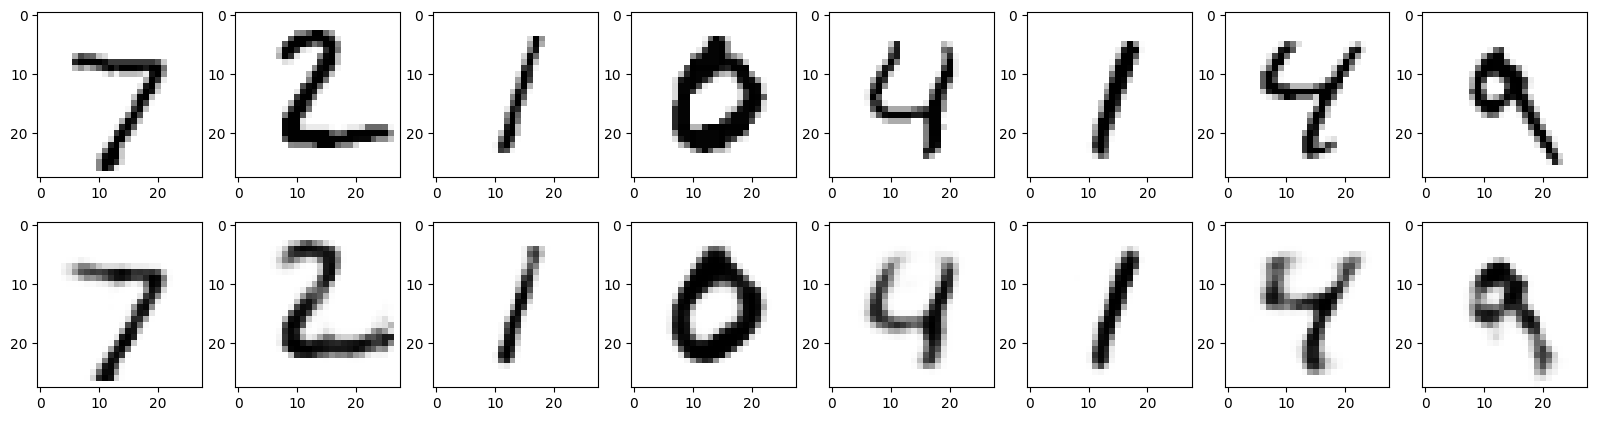

In [ ]:
#Set the figure size for the plot
figsize(20, 5)

#Iterate over a range of 8 examples from the test set
for i in range(8):
  #plot the original image from the test set
  subplot(2, 8, i+1)
  #Make a prediction using the stacked autoencoder on the current test image
  pred = stacked_autoencoder.predict(x_test[i].reshape((1, 28, 28)))
  # Display the original image
  imshow(x_test[i], cmap = "binary")
  #plot the reconstructed image by the stacked autoencoder
  subplot(2, 8, i+8+1)
  # Display the reconstructed image
  imshow(pred.reshape((28, 28)), cmap = "binary")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


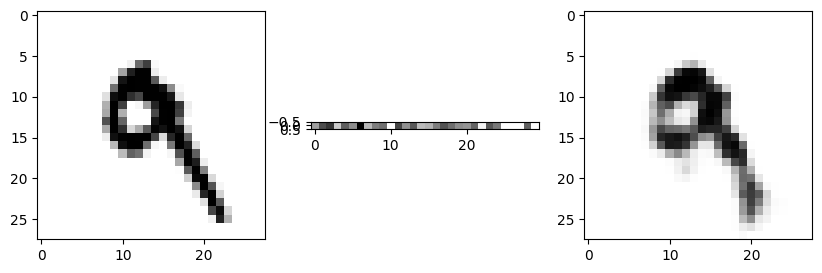

In [ ]:
figsize(10, 5)
# Plot the original image
subplot(1, 3, 1)
imshow(x_test[i], cmap = "binary")

# Plot the latent vector representation obtained from the encoder
subplot(1, 3, 2)
# Predict the latent vector representation of the selected test image
latent_vector = encoder.predict(x_test[i].reshape((1, 28, 28)))
imshow(latent_vector, cmap = "binary")

# Plot the reconstructed image from the latent vector using the decoder
subplot(1, 3, 3)
# Reconstruct the image from the latent vector representation
pred = decoder.predict(latent_vector)
imshow(pred.reshape((28, 28)), cmap = "binary")

In [ ]:
sparsity_low = 30 / (28 * 28)  # Upper bound for sparsity constraints
#sparsity_high = 1 - sparsity_low  # Lower bound for sparsity constraint
sparsity_high = 1 - 30 / (28 * 28)

# Print both values
print(sparsity_low, sparsity_high)


0.03826530612244898 0.9617346938775511


In [ ]:
# Define the encoder model using convolutional layers
encoder = keras.models.Sequential([
    # Reshpe the input into a 28 x 28 x 1 image (grayscale)
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    # First convolutional layer with 16 filters, each of size 3x3, ReLU activation,
    keras.layers.Conv2D(16, kernel_size = (3, 3), padding = "same", activation= "relu"),
    # Max pooling layer with pool size 2x2 to dowsample the spatial dimensions
    keras.layers.MaxPool2D(pool_size=2),
    # Second convolutional layer with 32 filters, each of size 3x3, ReLU activation
    keras.layers.Conv2D(32, kernel_size=(3, 3), padding= "same", activation= "relu"),
    #Max Pooling layer
    keras.layers.MaxPool2D(pool_size=2),
    # Third consvolutional layer with 64 filters, each of size 3x3, Relu activation
    keras.layers.Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"),
    #Max Pooling layer
    keras.layers.MaxPool2D(pool_size=2)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
encoder.predict(x_test[0].reshape((1, 28, 28))).shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


(1, 3, 3, 64)

In [ ]:
# Define the decoder model using convolutional transpose layers
decoder = keras.models.Sequential([
    # Convolutional transpose layer with 32 filters, eacho of size 3x3 stride 2, Relu
    keras.layers.Conv2DTranspose(16, kernel_size=(3,3), strides=2, padding="valid",
                                 activation="relu", input_shape=[3, 3, 64]),
    # Convolutional transpose layer with 16 filters, each of size 3x3, stride 2, ReLU
    keras.layers.Conv2DTranspose(16, kernel_size=(3, 3), strides=2, padding="same",
                                 activation="relu"),
    # Convolutional transpose layer with 1 filter, size 3x3, stride2, sigmoid activat
    keras.layers.Conv2DTranspose(1, kernel_size=(3, 3), strides=2, padding="same",
                                 activation="sigmoid"),
    # Reshape the output into the original image shape (28x28)
    keras.layers.Reshape([28, 28])
]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv_transpose.py:94: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
# Stack the encoder and decoder models to create the stacked autoencoder
stacked_autoencoder = keras.models.Sequential([encoder, decoder])

In [ ]:
# Compile the stacked autoencoder model
stacked_autoencoder.compile(
    # Use binary cross_entropy loss function for binary input data (normalized Pixel)
    loss = "binary_crossentropy",
    # Use the Adam optimazer for efficient training
    optimizer = 'adam'
    )

In [ ]:
# Train the stacked autoencoder model on the training data
history = stacked_autoencoder.fit(
    # Input and target data are both x_train (input images) for reconstruction
    x_train, x_train,
    # Train for 10 epochs
    epochs = 10,
    # Use x_test for validation during training
    validation_data= [x_test, x_test]
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.2067 - val_loss: 0.0862
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0851 - val_loss: 0.0792
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0794 - val_loss: 0.0764
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0764 - val_loss: 0.0745
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0747 - val_loss: 0.0728
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0733 - val_loss: 0.0720
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0723 - val_loss: 0.0713
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.0716 - val_loss: 0.0705
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.0711 - val_loss: 0.0701
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0707 - val_loss: 0.0698


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


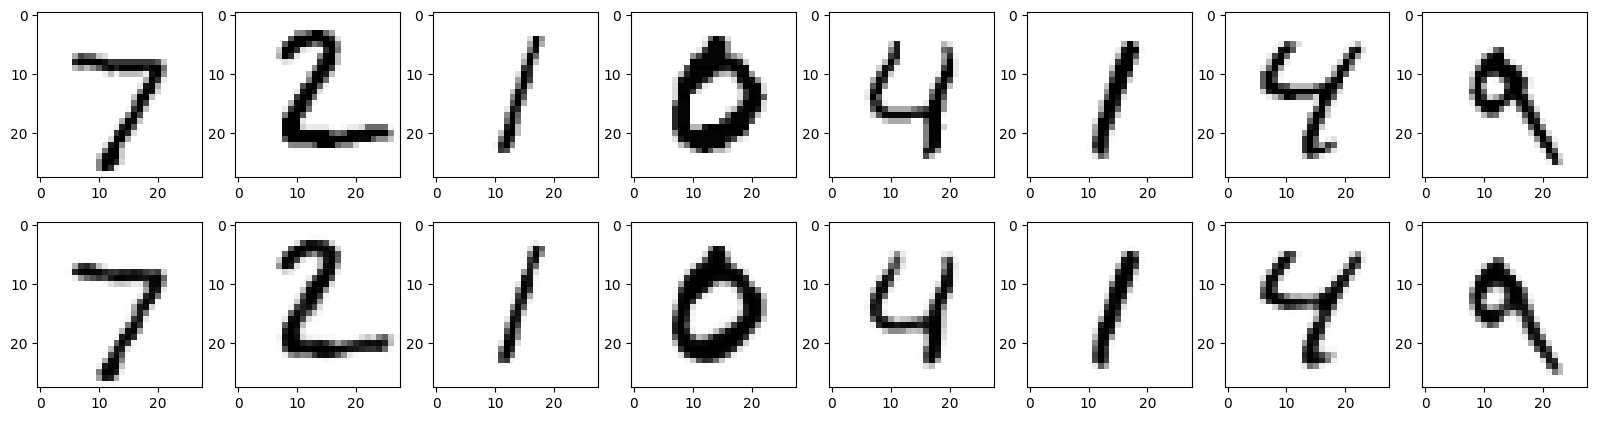

In [ ]:
# Set the figure size for the plot
figsize(20, 5)

# Iterate over 8 examples from the test set
for i in range(8):
  # plot the original image from the test set
  subplot(2, 8, i+1)
  # Make a prediction using the stacked autoencoder on the current test image
  pred = stacked_autoencoder.predict(x_test[i].reshape((1, 28, 28)))
  # Display the original image
  imshow(x_test[i], cmap= "binary")
  # Plot the reconstructed image by the stacked autoencoder
  subplot(2, 8, i+8+1)
  # Display the reconstructed image
  imshow(pred.reshape((28, 28)), cmap="binary")

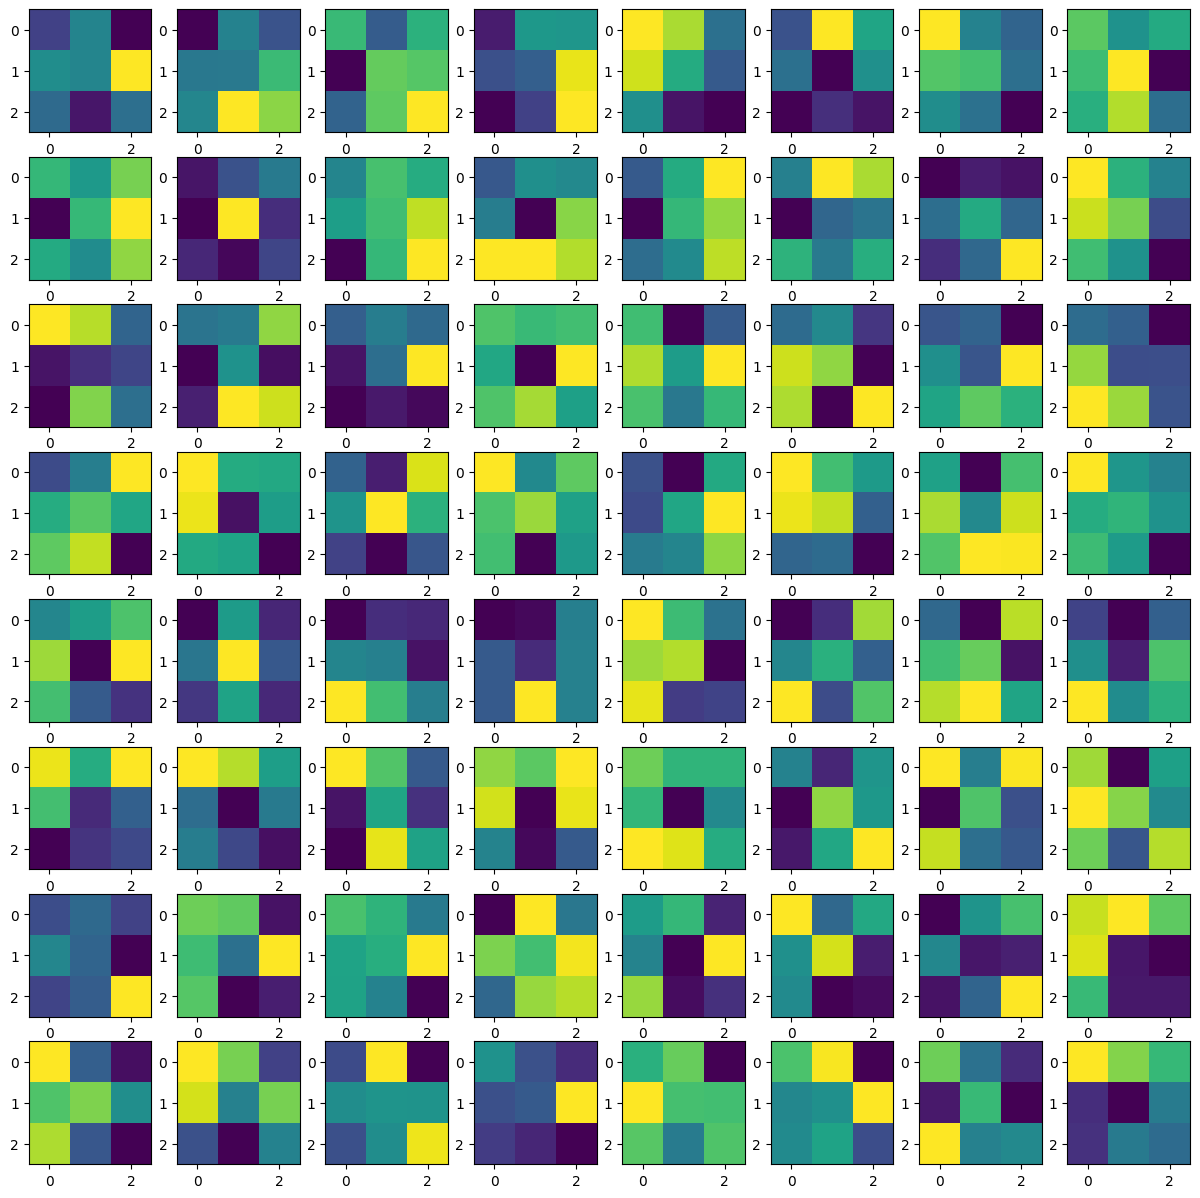

In [ ]:
# SEt the figure size for the plot
figsize(15, 15)

# Iterate over all filters in the last convolutional layer of the encoder
for i in range(8 * 8):
  # Plot each filter as a subplot in an 8x8 grid
  subplot(8, 8, i+1)
  # Display the weights (filters) of the convolutional layer
  imshow (encoder.layers[-2].weights[0][:, :, 0, i])

Denoising Autoencoder

In [ ]:
import numpy as np

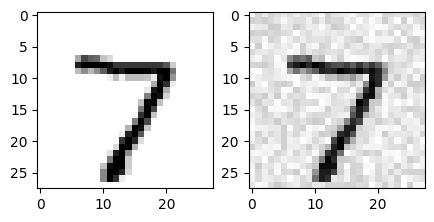

In [ ]:
# Set the figure size for the plot
figsize(5, 10)

# Plot the original image from the test set
subplot(1, 2, 1)
imshow(x_test[0], cmap="binary")

# Plot the noisy version of the original image
subplot(1, 2, 2)
# GEnerate random noise and add it to the original image
noise = np.random.random((28, 28,)) /4
imshow(x_test[0] + noise, cmap= "binary")

In [ ]:
# Define the encoder model usin dense (fully connected) layers
encoder = keras.models.Sequential([
    # Flatten the input images (28x28) into a 1D array of 784 elements
    keras.layers.Flatten(input_shape=[28, 28]),
    # Add a dense layer with 100 neurons and ReLU activation function
    keras.layers.Dense(100, activation="relu"),
    #Add another dense laher with 100 neurons and ReLU activation
    keras.layers.Dense(100, activation="relu"),
    # Add a dense layer with 30 neurons and ReLU activation function
    keras.layers.Dense(30, activation="relu")
])

In [ ]:
# Define the decoder model using dense (fully connected) layers
decoder = keras.models.Sequential([
    # Add a dense layer with 100 neurons and ReLu activation function,
    keras.layers.Dense(100, activation="relu", input_shape=[30]),
    # Add another dense layer with 100 neurons and Relu activation
    keras.layers.Dense(100,activation="relu"),
    # Add a dense layer with 784 neurons (28* 28) and sigmoid activatation function
    keras.layers.Dense(28 * 28, activation='sigmoid'),
    # Reshape the output into the original image shape (28x28)
    keras.layers.Reshape([28, 28])
]
)

In [ ]:
# Stack the encoder and decoder models to create the stacked autoencoder
stacked_autoencoder = keras.models.Sequential([encoder, decoder])

In [ ]:
# Compile the stacked autoencoder model
stacked_autoencoder.compile(
    # Use binary cross_entropy loss function for binary input data (normalized Pixel)
    loss = "binary_crossentropy",
    # Use the Adam optimazer for efficient training
    optimizer = 'adam'
    )

In [ ]:
# Add random noise to the training and test data
x_train_noise = x_train + ((np.random.random(x_train.shape)) / 4)
x_test_noise = x_test + ((np.random.random(x_test.shape)) / 4)

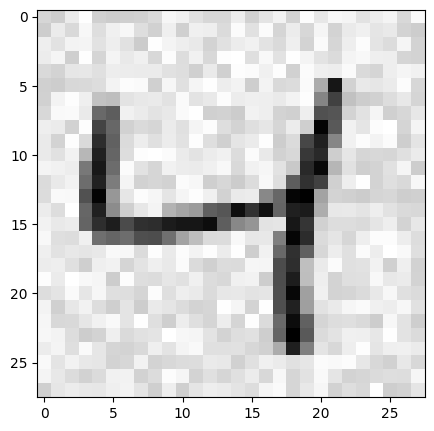

In [ ]:
# Display an example of the noisy training data
imshow(x_train_noise[2], cmap='binary')

In [ ]:
# Train the stacked autoencoder model on the noisy training data
history = stacked_autoencoder.fit(
    # Input is the noisy training data (x_train_noise), target is the original clean
    x_train_noise, x_train,
    # Train for 10 epochs
    epochs = 10,
    # Use noisy test data (x_test_noise) for validation during  during training, with original
    validation_data = [x_test_noise, x_test]
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.2144 - val_loss: 0.1240
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1213 - val_loss: 0.1101
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1097 - val_loss: 0.1044
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.1048 - val_loss: 0.1009
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1008 - val_loss: 0.0978
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0978 - val_loss: 0.0950
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0958 - val_loss: 0.0935
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0942 - val_loss: 0.0922
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0927 - val_loss: 0.0912
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0918 - val_loss: 0.0906
